In [33]:
from data import *
from model import *
from plot import *
from train import *
import time
from matplotlib import pylab
import datafold.pcfold as pfold
import seaborn as sns

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Swiss Roll

In [ ]:
#n=50000 crashed
#n=40000 crashed
#n=30000 crashed
#n=20000 crashed
nr_samples=5000
data, timesteps = get_swiss_roll(nr_samples)
plot_swiss_roll(nr_samples,data, timesteps)

In [ ]:
L=10
dmap = DiffusionMap()
start = time.time()
evecs, evals = dmap.diffusion_map_datafold(data,L,isSwissRoll=True,isWordVec=False)
end = time.time()

print(f"The run time is : {end - start}")

In [ ]:
plot_diffusion_maps(nr_samples, L, evecs, evals ,time=timesteps)

In [ ]:
phi_l_plot = np.concatenate((evecs[:, 1].reshape(-1, 1), evecs[:, 5].reshape(-1, 1)), axis=1)
plot_2d(phi_l_plot, timesteps, "Diffusion map Embedding with 5th eigenvectors")

## Word2vec

In [34]:
gensim_model  = gensim.downloader.load("word2vec-google-news-300")

In [35]:
#10000 crashed
num_data_sample=5000

index = np.random.randint(0, len(gensim_model.index_to_key), (num_data_sample))
words = [gensim_model.index_to_key[i] for i in index]
embeddings = [gensim_model[word] for word in words]

In [36]:
data_word=np.array(embeddings)
X = data_word

In [37]:
L_cifar=2
dmap=DiffusionMap()
start = time.time()
Word_dmap,val=dmap.diffusion_map_datafold(X,L_cifar,isSwissRoll=True,isWordVec=False)
end = time.time()
print(f"The run time is : {end - start}")

The run time is : 162.75507807731628


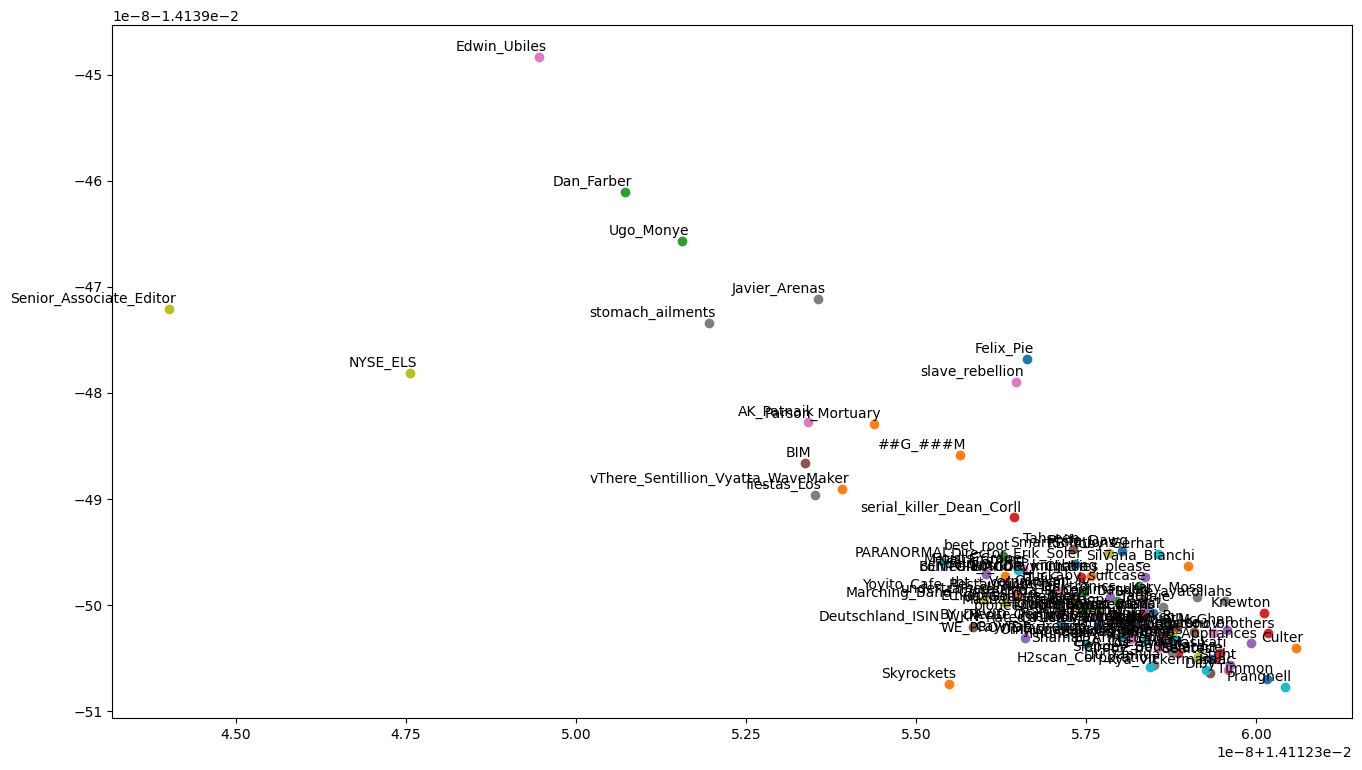

In [38]:
plot_word_embedding_damp(Word_dmap[:,1:3], words)

[[-0.05274057 -0.23462445]
 [ 0.00269743 -0.07903436]
 [-0.0873002  -0.31403189]
 [ 0.29106563  0.0009039 ]
 [-0.02237266  0.03628229]
 [-0.05029475  0.03315323]
 [-0.06402816  0.05978156]
 [-0.05680838  0.07119949]
 [-0.02049584  0.17161659]
 [-0.05885337  0.09918362]
 [-0.05975921  0.12926202]
 [-0.05898422 -0.26361758]
 [ 0.00237982 -0.07722019]
 [-0.15701825 -0.70482115]
 [ 0.897692   -0.04404234]
 [-0.05888336  0.11033126]
 [-0.0788084   0.10082288]
 [-0.08946781  0.09583589]
 [-0.08620737  0.23955756]
 [-0.09811028  0.1812884 ]
 [-0.0933277   0.16308806]
 [-0.09807351  0.22469419]]
China Beijing
Russia Moscow
Japan Tokyo
Turkey Ankara
Poland Warsaw
Germany Berlin
France Paris
Italy Athens
Greece Rome
Spain Madrid
Portugal Lisbon


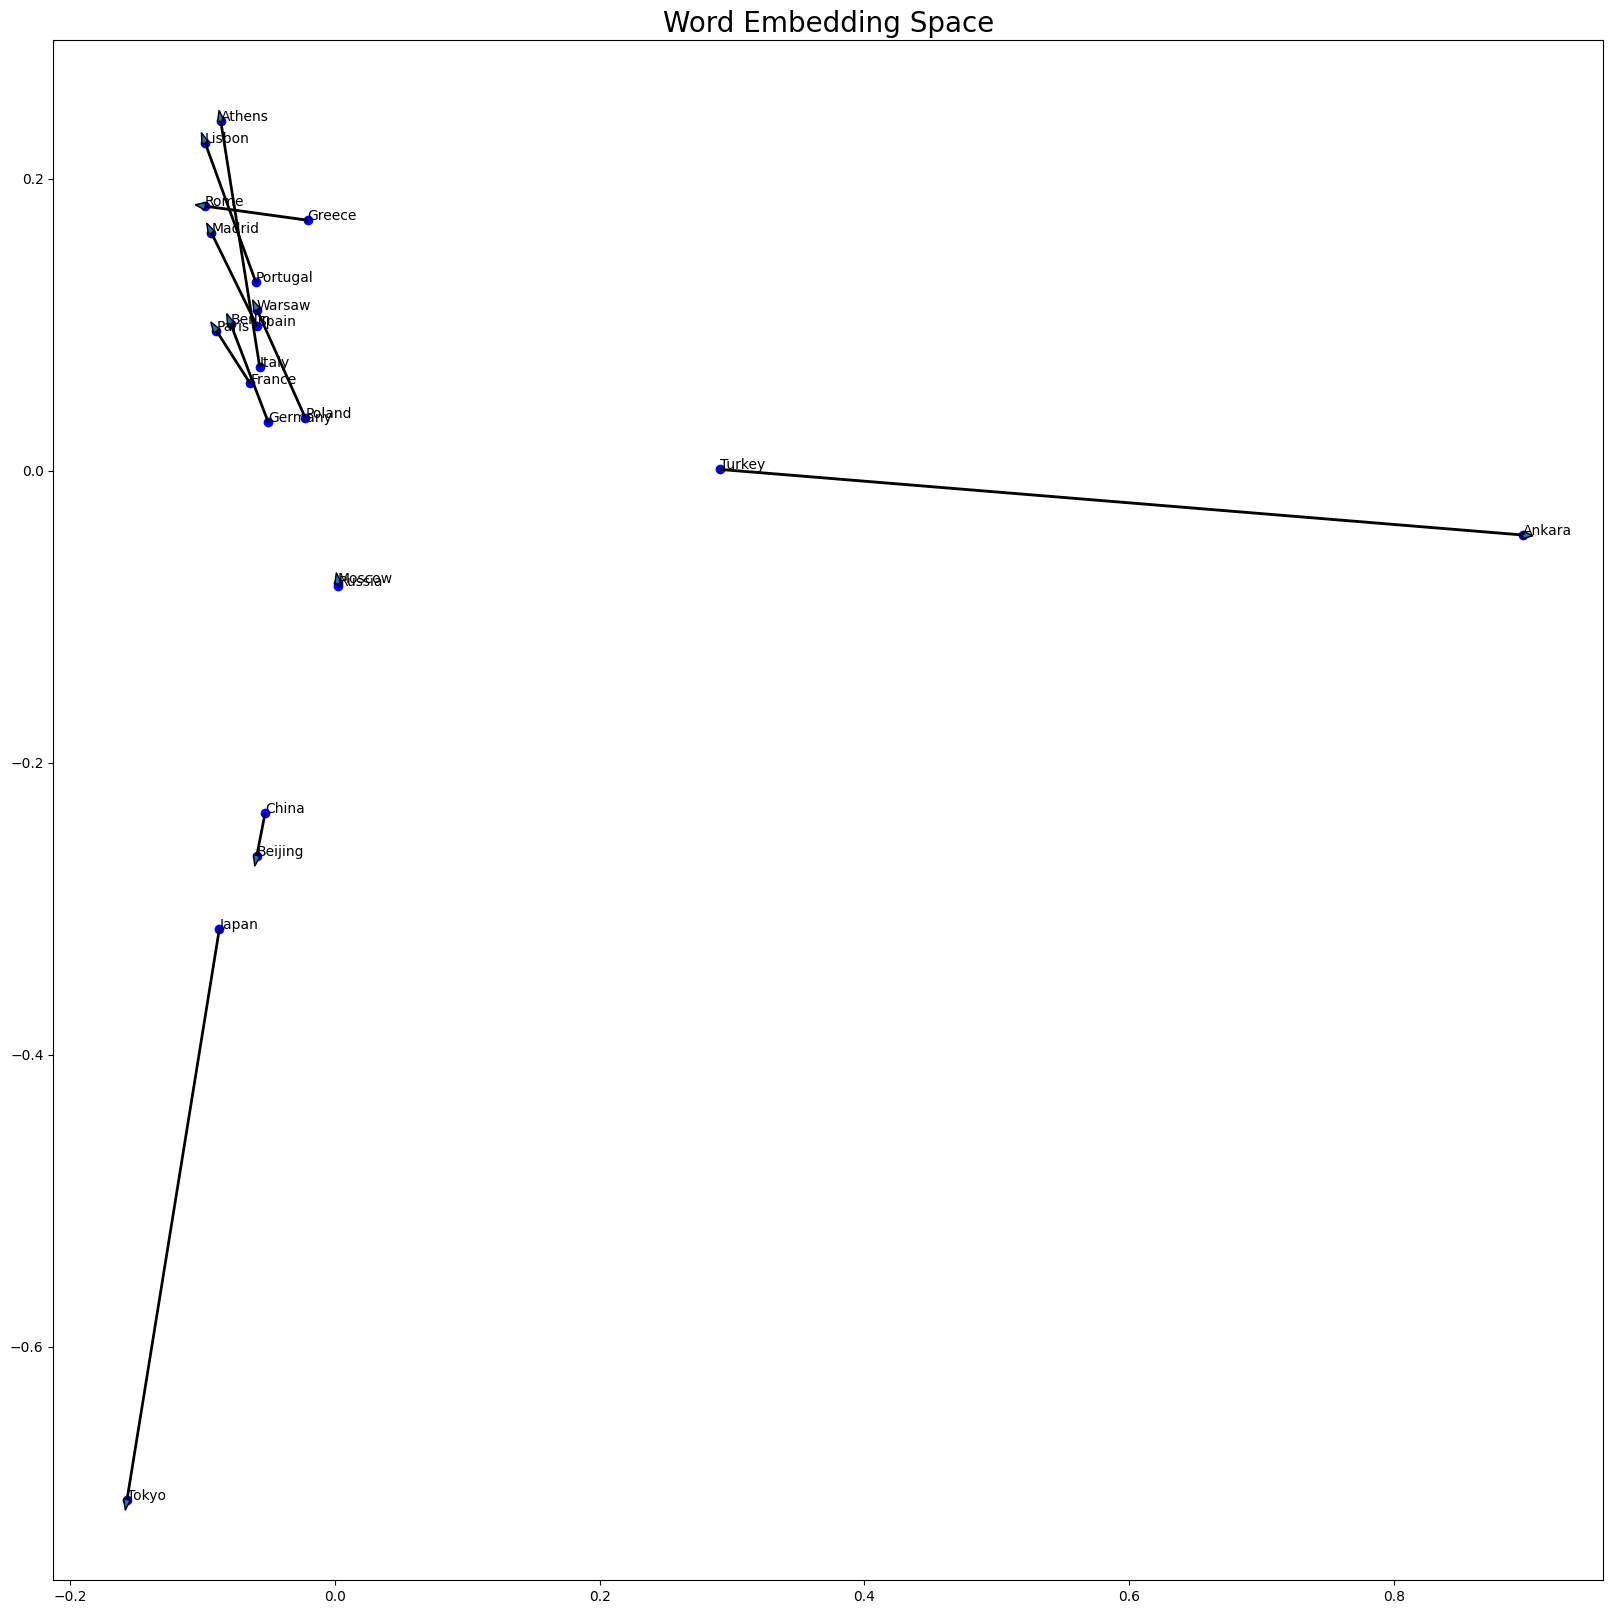

In [39]:
countries = ['China', 'Russia', 'Japan', 'Turkey', 'Poland', 'Germany', 'France', 'Italy', 'Greece', 'Spain', 'Portugal']
capitals = ['Beijing', 'Moscow', 'Tokyo', 'Ankara', 'Warsaw', 'Berlin', 'Paris', 'Athens', 'Rome', 'Madrid', 'Lisbon']
embeddings = [gensim_model[word] for word in countries + capitals]
embeddings = np.array(embeddings)
L_cifar=2
dim_red_em,val = dmap.diffusion_map_datafold(embeddings,L_cifar,isSwissRoll=True,isWordVec=False)

dim_red_em = dim_red_em[:,1:]
print(dim_red_em)

word_embedding_plot(dim_red_em, countries + capitals)

for i in range(len(countries)):
    country = dim_red_em[i]
    capital = dim_red_em[i+len(countries)]
    print(countries[i], capitals[i])
    plt.arrow(country[0], country[1], capital[0]-country[0], capital[1]-country[1], head_width = 0.005)

## Cifar 10

In [ ]:
train_loader, val_loader, test_loader = cifar10(train_val_split = [45000, 5000], batch_size=32)

In [ ]:
from torchvision.utils import make_grid
for images, _ in train_loader:
    print('images.shape:', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    break

In [ ]:
num_sample=5024
train_images ,train_labels=cifar10_dmap(train_loader,num_sample)


In [ ]:
L_cifar=6
dmap_caifar = DiffusionMap()

start = time.time()
phi_l_cifar, lambda_l_cifar  = dmap_caifar.diffusion_map_datafold(train_images,L_cifar,isSwissRoll=None,isWordVec=None)
end = time.time()

print(f"The run time is : {end - start}")


In [ ]:
phi_l_cifar.shape

In [ ]:
plt.scatter(phi_l_cifar[:, 1], phi_l_cifar[:, 2], c=train_labels, cmap='Set3')

In [ ]:
plot_diffusion_maps(num_sample, L_cifar, phi_l_cifar, lambda_l_cifar,train_labels,time=None)

In [ ]:

phi_l_plot = np.concatenate((phi_l_cifar[:, 1].reshape(-1, 1), phi_l_cifar[:, 4].reshape(-1, 1)), axis=1)
plot_2d(phi_l_plot, timesteps, "Diffusion map Embedding with 4th eigenvectors")